In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
zomato = pd.read_excel('/Users/abhi/Desktop/MSU/8. Coursework/3. Fall Semester/ITM881_Network Analytics/03_Project/Zomato_filtered.xlsx')
swiggy = pd.read_excel('/Users/abhi/Desktop/MSU/8. Coursework/3. Fall Semester/ITM881_Network Analytics/03_Project/Swiggy_filtered.xlsx')

### Sentiment Analysis

In [3]:
from textblob import TextBlob

zomato['review_description'] = zomato['review_description'].astype(str)
swiggy['review_description'] = swiggy['review_description'].astype(str)

# Create a function to analyze sentiment
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.05:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

zomato['sentiment'] = zomato['review_description'].apply(analyze_sentiment)
swiggy['sentiment'] = swiggy['review_description'].apply(analyze_sentiment)

# Display the resulting DataFrame with sentiment labels
print(zomato[['review_description', 'sentiment']])
print(swiggy[['review_description', 'sentiment']])


                                      review_description sentiment
0      A few months ago, the app worked flawlessly. U...  Positive
1      Great delivery app. But off lately there have ...  Positive
2      Your app and delivery everything is good. But ...  Positive
3      Poor cust. Experience. I ordered items from a ...  Negative
4      Zomato seems to have lost it recently. Have be...  Negative
...                                                  ...       ...
87964                   Very fast dilevery very good app  Positive
87965  Good food with discounted from famous restaura...  Positive
87966               Your delivery is so fast . I like it  Positive
87967                 Nice service&cashback is very good  Positive
87968                                      Gold is Gold!   Neutral

[87969 rows x 2 columns]
                                      review_description sentiment
0      Swiggy clearly has to be one of the worst apps...  Negative
1      The delivery time for each or

In [4]:
# Count the number of occurrences for each sentiment label
sentiment_counts_zomato = zomato['sentiment'].value_counts()
sentiment_counts_swiggy = swiggy['sentiment'].value_counts()

# Calculate the total number of samples
total_samples_zomato = len(zomato)
total_samples_swiggy = len(swiggy)


# Calculate the percentage of each sentiment
percentage_positive_z = (sentiment_counts_zomato.get('Positive', 0) / total_samples_zomato) * 100
percentage_negative_z = (sentiment_counts_zomato.get('Negative', 0) / total_samples_zomato) * 100
percentage_neutral_z = (sentiment_counts_zomato.get('Neutral', 0) / total_samples_zomato) * 100

# Display the percentages
print(f"Percentage of Positive Sentiments for Zomato: {percentage_positive_z:.2f}%")
print(f"Percentage of Negative Sentiments for Zomato: {percentage_negative_z:.2f}%")
print(f"Percentage of Neutral Sentiments for Zomato: {percentage_neutral_z:.2f}%")

# Calculate the percentage of each sentiment
percentage_positive_s = (sentiment_counts_swiggy.get('Positive', 0) / total_samples_swiggy) * 100
percentage_negative_s = (sentiment_counts_swiggy.get('Negative', 0) / total_samples_swiggy) * 100
percentage_neutral_s = (sentiment_counts_swiggy.get('Neutral', 0) / total_samples_swiggy) * 100

# Display the percentages
print(f"Percentage of Positive Sentiments for Swiggy: {percentage_positive_s:.2f}%")
print(f"Percentage of Negative Sentiments for Swiggy: {percentage_negative_s:.2f}%")
print(f"Percentage of Neutral Sentiments for Swiggy: {percentage_neutral_s:.2f}%")


Percentage of Positive Sentiments for Zomato: 54.89%
Percentage of Negative Sentiments for Zomato: 31.76%
Percentage of Neutral Sentiments for Zomato: 13.34%
Percentage of Positive Sentiments for Swiggy: 41.91%
Percentage of Negative Sentiments for Swiggy: 42.14%
Percentage of Neutral Sentiments for Swiggy: 15.95%


### Zomato

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')

# Fit and transform the "review_description" column
tfidf_matrix = tfidf_vectorizer.fit_transform(zomato['review_description'])

# Get the feature names (words or phrases)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame to display the top keywords or phrases
keywords_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)

# Find the most common keywords or phrases in positive reviews
positive_reviews = zomato[zomato['sentiment'] == 'Positive']
positive_keywords = keywords_df.loc[positive_reviews.index].mean().sort_values(ascending=False)

# Find the most common keywords or phrases in negative reviews
negative_reviews = zomato[zomato['sentiment'] == 'Negative']
negative_keywords = keywords_df.loc[negative_reviews.index].mean().sort_values(ascending=False)

# Display the top keywords or phrases for positive and negative reviews
print("Top Keywords or Phrases in Positive Reviews:")
print(positive_keywords.head(10))

print("\nTop Keywords or Phrases in Negative Reviews:")
print(negative_keywords.head(10))


Top Keywords or Phrases in Positive Reviews:
good        0.142863
delivery    0.114847
app         0.102775
food        0.090583
zomato      0.076577
service     0.075852
fast        0.063888
ðÿ          0.056850
best        0.056812
time        0.053741
dtype: float64

Top Keywords or Phrases in Negative Reviews:
order         0.107315
worst         0.104731
bad           0.094444
zomato        0.091965
food          0.084498
service       0.083921
delivery      0.081536
customer      0.080845
app           0.078064
experience    0.062443
dtype: float64


### Swiggy

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')

# Fit and transform the "review_description" column
tfidf_matrix = tfidf_vectorizer.fit_transform(swiggy['review_description'])

# Get the feature names (words or phrases)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame to display the top keywords or phrases
keywords_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)

# Find the most common keywords or phrases in positive reviews
positive_reviews = swiggy[swiggy['sentiment'] == 'Positive']
positive_keywords = keywords_df.loc[positive_reviews.index].mean().sort_values(ascending=False)

# Find the most common keywords or phrases in negative reviews
negative_reviews = swiggy[swiggy['sentiment'] == 'Negative']
negative_keywords = keywords_df.loc[negative_reviews.index].mean().sort_values(ascending=False)

# Display the top keywords or phrases for positive and negative reviews
print("Top Keywords or Phrases in Positive Reviews:")
print(positive_keywords.head(10))

print("\nTop Keywords or Phrases in Negative Reviews:")
print(negative_keywords.head(10))


Top Keywords or Phrases in Positive Reviews:
good        0.137698
app         0.110522
delivery    0.107824
food        0.090936
swiggy      0.079847
service     0.063212
best        0.059411
time        0.055023
ðÿ          0.053882
order       0.051178
dtype: float64

Top Keywords or Phrases in Negative Reviews:
worst       0.115177
order       0.104573
delivery    0.095116
app         0.090313
service     0.089577
bad         0.086564
swiggy      0.082740
food        0.073652
customer    0.073073
time        0.062778
dtype: float64


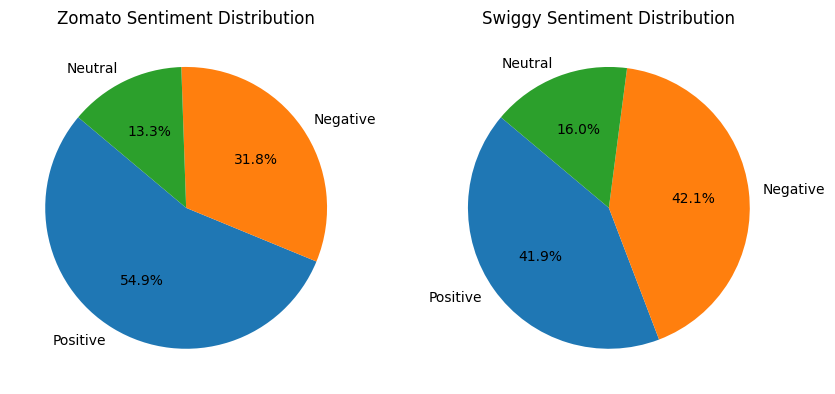

In [7]:
import matplotlib.pyplot as plt

# Data
sentiments = ['Positive', 'Negative', 'Neutral']
zomato_percentages = [54.89, 31.76, 13.34]
swiggy_percentages = [41.91, 42.14, 15.95]

# Plotting for Zomato
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(zomato_percentages, labels=sentiments, autopct='%1.1f%%', startangle=140)
plt.title('Zomato Sentiment Distribution')

# Plotting for Swiggy
plt.subplot(1, 2, 2)
plt.pie(swiggy_percentages, labels=sentiments, autopct='%1.1f%%', startangle=140)
plt.title('Swiggy Sentiment Distribution')

plt.show()


### Thumbs Up / Thumbs Down

In [20]:
zomato.head()

,App,review_date,review_description,rating,thumbsUpCount,developer_response,developer_response_date,appVersion
0,Zomato,2023-05-07 15:42:17,"A few months ago, the app worked flawlessly. U...",1,337,NaN,NaT,17.4.6
1,Zomato,2023-05-12 17:51:32,Great delivery app. But off lately there have ...,2,223,NaN,NaT,17.4.8
2,Zomato,2023-06-17 14:23:16,Your app and delivery everything is good. But ...,3,525,NaN,NaT,17.5.3
3,Zomato,2023-06-16 07:19:44,Poor cust. Experience. I ordered items from a ...,2,396,"Hi Priya, glad to hear that! Thank you for you...",2022-06-16 10:59:51,17.5.3
4,Zomato,2023-06-04 18:23:12,Zomato seems to have lost it recently. Have be...,1,296,NaN,NaT,17.5.1


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

# Assuming you have a DataFrame 'zomato' with a 'review_description' column
X = zomato['review_description'].fillna('')
y = zomato['thumbsUpCount']

# Convert ratings to binary sentiment labels (1 for positive, 0 for negative)
y = (y > 0).astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bag-of-Words representation of the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Create and train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9059906786404456
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     15867
           1       0.54      0.29      0.38      1727

    accuracy                           0.91     17594
   macro avg       0.73      0.63      0.66     17594
weighted avg       0.89      0.91      0.89     17594



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
# Assuming you have a DataFrame 'zomato' with a 'review_description' column
X = swiggy['review_description']
y = swiggy['thumbsUpCount']

# Convert ratings to binary sentiment labels (1 for positive, 0 for negative)
y = (y > 0).astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bag-of-Words representation of the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Create and train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.8706237128567226
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11738
           1       0.55      0.30      0.39      1858

    accuracy                           0.87     13596
   macro avg       0.72      0.63      0.66     13596
weighted avg       0.85      0.87      0.85     13596



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
